In [14]:
import os
import matplotlib as plt

#importing the datasets

def count_files_and_images(directory):
    class_counts = {}
    total_images = 0

    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            file_count = len(os.listdir(class_path))
            class_counts[class_name] = file_count
            total_images += file_count

    return class_counts, total_images

train_directory = 'dataset/train'
test_directory = 'dataset/test'

train_class_counts, total_train_images = count_files_and_images(train_directory)
test_class_counts, total_test_images = count_files_and_images(test_directory)



In [15]:
# Visualizing the datasets


print("Train Directory:")
print("Class Counts:", train_class_counts)
print("Total Train Images:", total_train_images)

print("\nTest Directory:")
print("Class Counts:", test_class_counts)
print("Total Test Images:", total_test_images)

Train Directory:
Class Counts: {'chatamari': 142, 'chhoila': 120, 'dalbhat': 205, 'dhindo': 108, 'gundruk': 80, 'kheer': 288, 'momo': 274, 'sekuwa': 125, 'selroti': 206}
Total Train Images: 1548

Test Directory:
Class Counts: {'chatamari': 36, 'chhoila': 30, 'dalbhat': 53, 'dhindo': 27, 'gundruk': 20, 'kheer': 73, 'momo': 69, 'sekuwa': 34, 'selroti': 53}
Total Test Images: 395


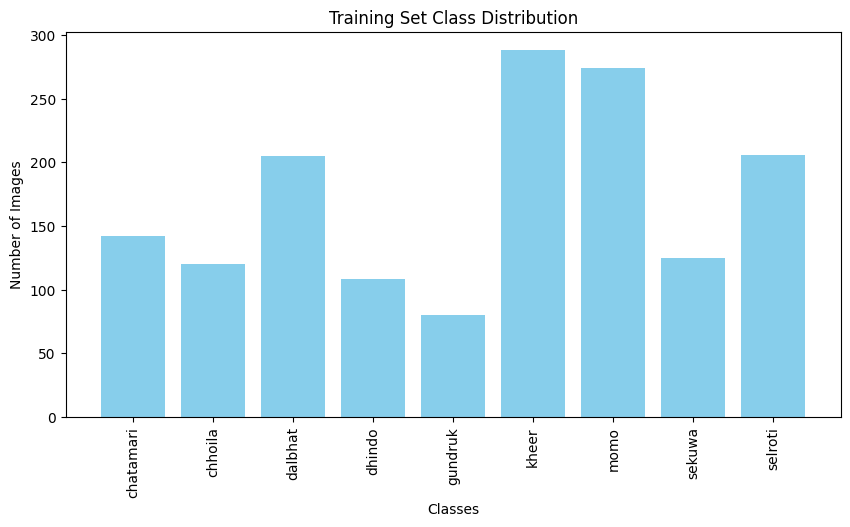

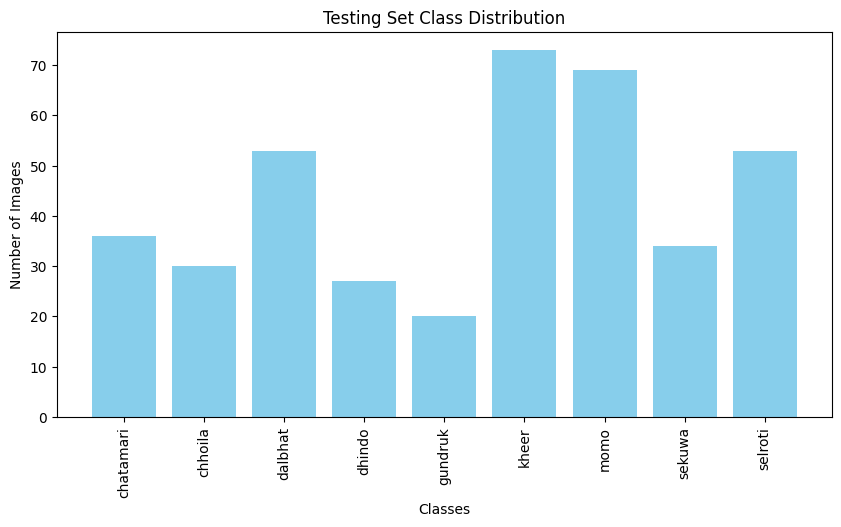

In [18]:
#plotting it in bar graph

import matplotlib.pyplot as plt
def plot_class_distribution(class_counts, title):
    classes = list(class_counts.keys())
    counts = list(class_counts.values())
    
    plt.figure(figsize=(10, 5))
    plt.bar(classes, counts, color='skyblue')
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()



plot_class_distribution(train_class_counts, 'Training Set Class Distribution')
plot_class_distribution(test_class_counts, 'Testing Set Class Distribution')

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator,  img_to_array, load_img


IMAGE_SIZE = (128, 128)  # Example image size
BATCH_SIZE = 32
DATASET_DIR = 'dataset'

# Define data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% of data for validation
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess images from directories
train_generator = train_datagen.flow_from_directory(
    os.path.join(DATASET_DIR, 'train'),
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

print('Splitted validation out of train dataset:')
validation_generator = train_datagen.flow_from_directory(
    os.path.join(DATASET_DIR, 'train'),
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 1241 images belonging to 9 classes.
Found 307 images belonging to 9 classes.


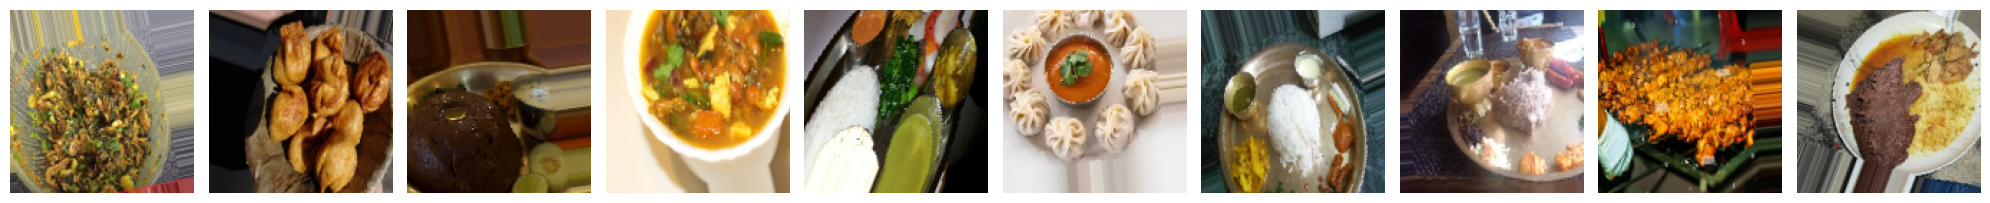

In [29]:
#Displaying some images with augmentation
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

augmented_images, _ = next(train_generator)
plot_images(augmented_images[:10])

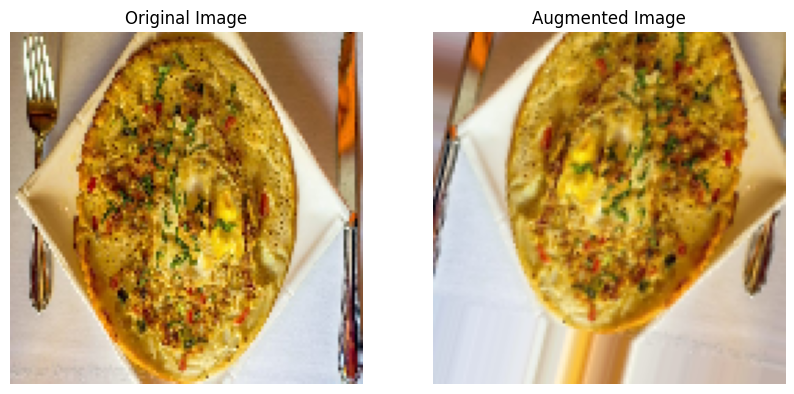

In [38]:
def display_image_before_after_augmentation(image_path):
    # Load and preprocess the original image
    original_img = load_img(image_path, target_size=IMAGE_SIZE)
    original_img_array = img_to_array(original_img) / 255.0  # Normalize the image

    # Apply augmentation
    augmented_img_array = train_datagen.random_transform(original_img_array)

    # Plot original and augmented images
    plt.figure(figsize=(10, 5))
    
    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(original_img_array)
    plt.axis('off')
    plt.title('Original Image')

    # Augmented Image
    plt.subplot(1, 2, 2)
    plt.imshow(augmented_img_array)
    plt.axis('off')
    plt.title('Augmented Image')

    plt.show()

# Example usage: Display the same image before and after augmentation
class_name = 'chatamari'  # Replace with your class name
image_name = '24.jpeg'  # Replace with your image file name
image_path = os.path.join(DATASET_DIR, 'train', class_name, image_name)

display_image_before_after_augmentation(image_path)